<h1><center>CSCI - 6409 - The Process of Data Science - Fall 2022</h1></center>
<h1><center>Assignment 3</h1></center>

<b>Akshay Sharma</b>  
B00925863  


<b>Mayuri Chilekar</b>  
B00925385  

### 1. Task 1<a id='top'></a>

#### Data Preparation

#### a. Build the data quality report and the data quality plan.

In [25]:
#importing data and requisite libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from google.colab import drive
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import matplotlib as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import math
from textwrap import wrap
import warnings
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
data = drive.mount('/content/drive')
data = arff.loadarff('/content/drive/MyDrive/Dalhousie_MDI/process_of_ds/assignment_3/phpKo8OWT.arff')
df = pd.DataFrame(data[0])

Mounted at /content/drive


In [3]:
print(df.head(10)) #Exploring Data
print(df.iloc[0]) # Viewing first row of our dataset

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [4]:
#Checking dataframe info to check for null values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Datatype for all of the columns seem to be correct, so we dont need to convert dtype for this dataframe.

#### Data Quality Report - Checking our data for missing values, outliers etc.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,6.407202e-16,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking cardinality and class imbalance of our target feature
card_target=len(df["Class"].unique())
print(card_target)
print(df[["Class"]].value_counts())

2
Class
b'0'     284315
b'1'        492
dtype: int64


##### Since all our features are continious, we dont need to check for cardinaltiy for this feature set and they dont have null values or missing values as well so we will now inspect our dataframe for only outliers value with the help of Boxplot

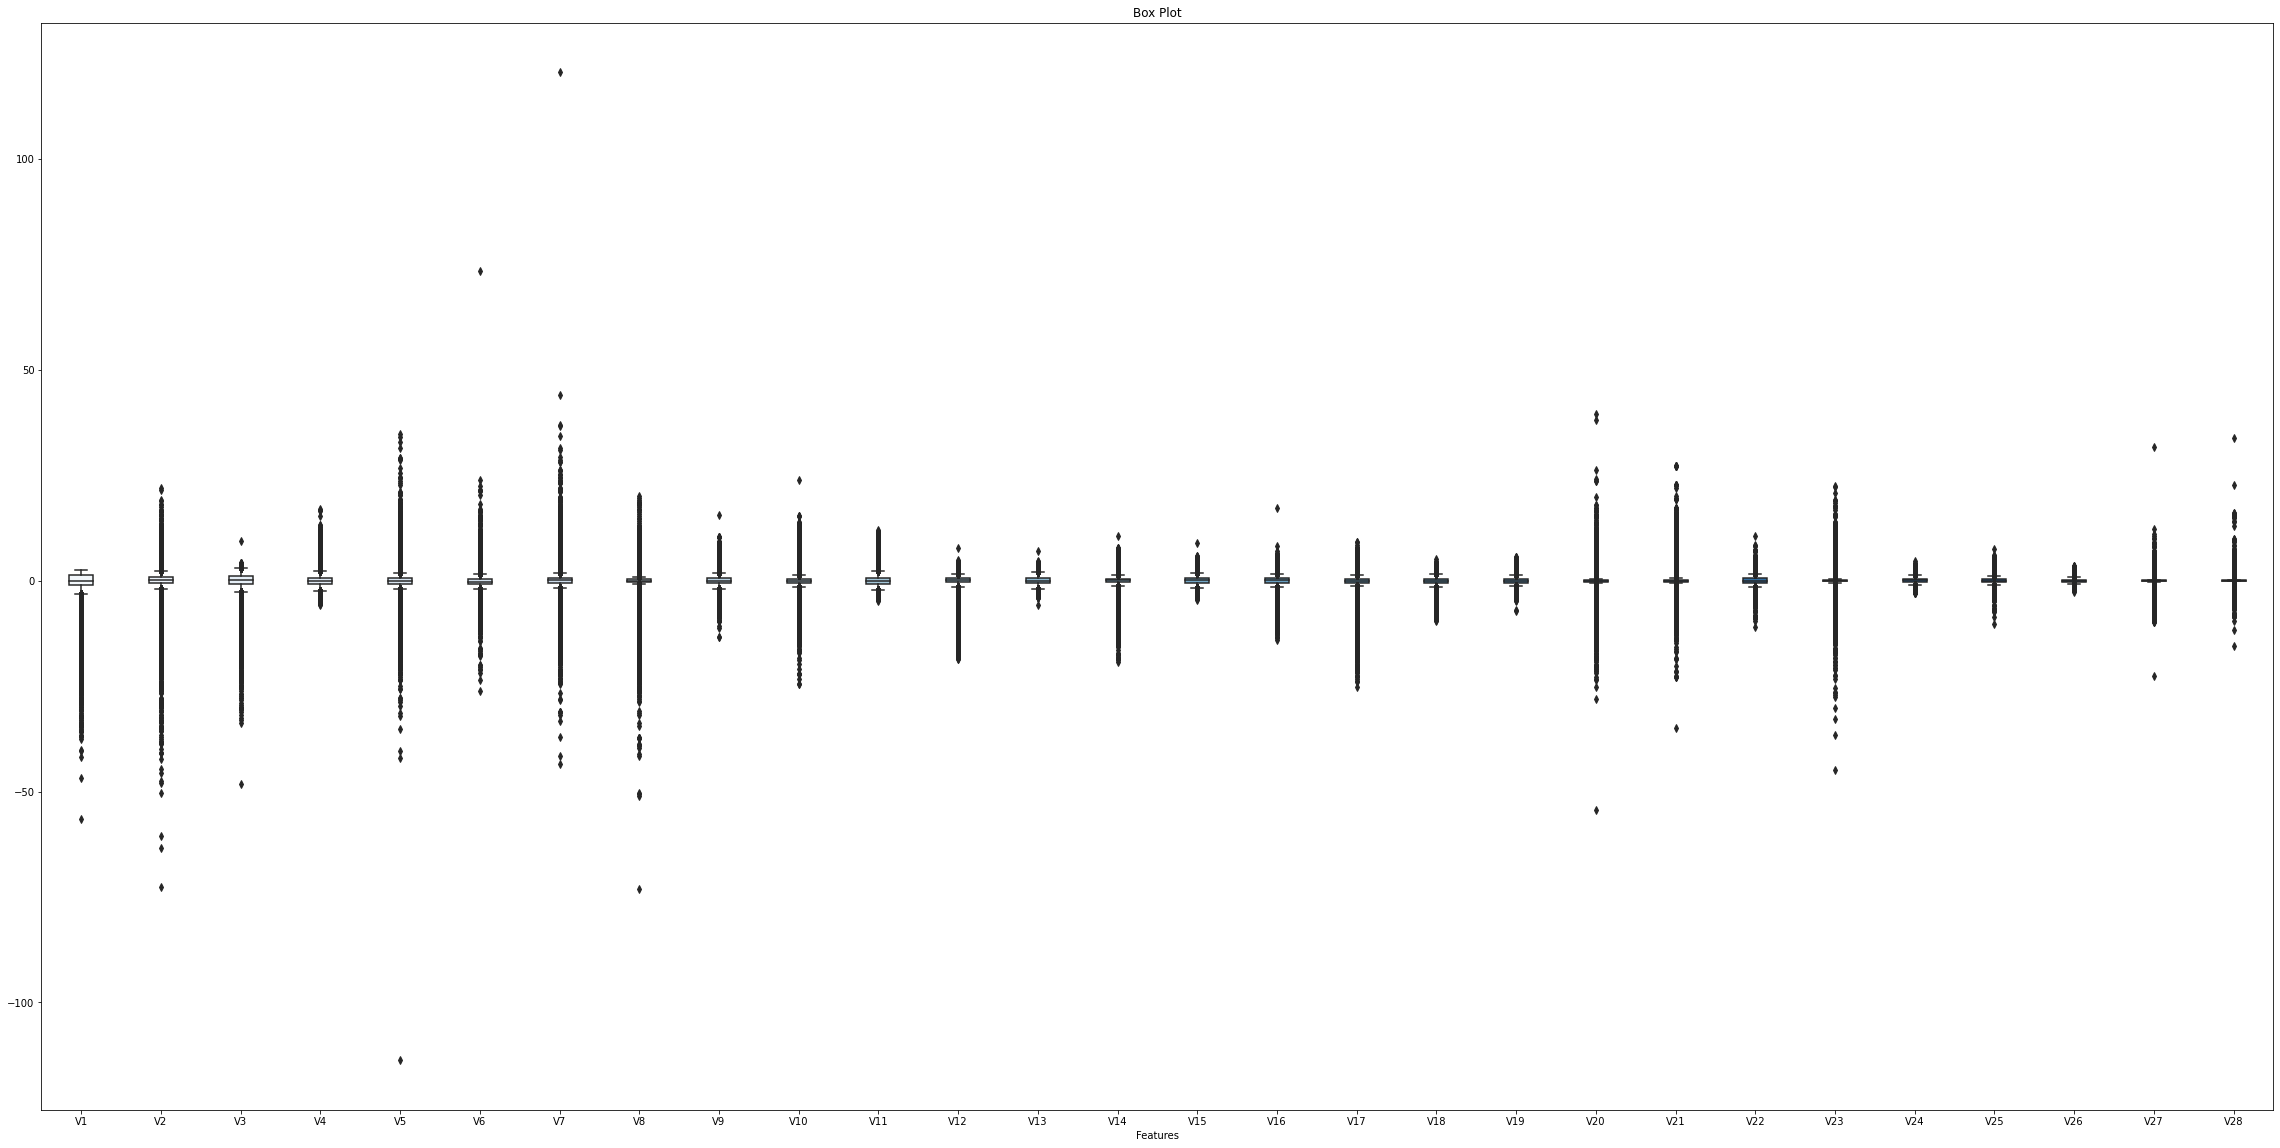

In [8]:
#Plotting Boxplot for every feature
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
ax=sns.boxplot(data=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']],palette="Blues",saturation=0.75, width=0.3, dodge=True,linewidth=None, whis=1)
ax.set(title="Box Plot",xlabel="Features")
plt.show()

##### We could observe outliers in almost all of features, and since we have enough datapoints available, we will now begin with preprocessing of our data

#### b. Preprocess your data according to the data quality plan.
##### Since almost each of the feature has outliers, so removing them would result in deleting many examples of the dataset, so instead of removing the outliers value, we would cap the outliers value i.e replace them with the upper and lower threshold. This would help us to solve the problem of outliers as well as not reduce the no of examples from our dataset.

In [9]:
 # Capping values at 0.01 and 0.99 percentile values
 def remove_outliers(df):
    for i in df.columns:
        if df[i].dtype=="float64":
            percentile = df[i].quantile([0.01,0.99]).values
            df[i][df[i] <= percentile[0]] = percentile[0]
            df[i][df[i] >= percentile[1]] = percentile[1]
        else:
            df[i]=df[i]
    return df

In [10]:
final_df=remove_outliers(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


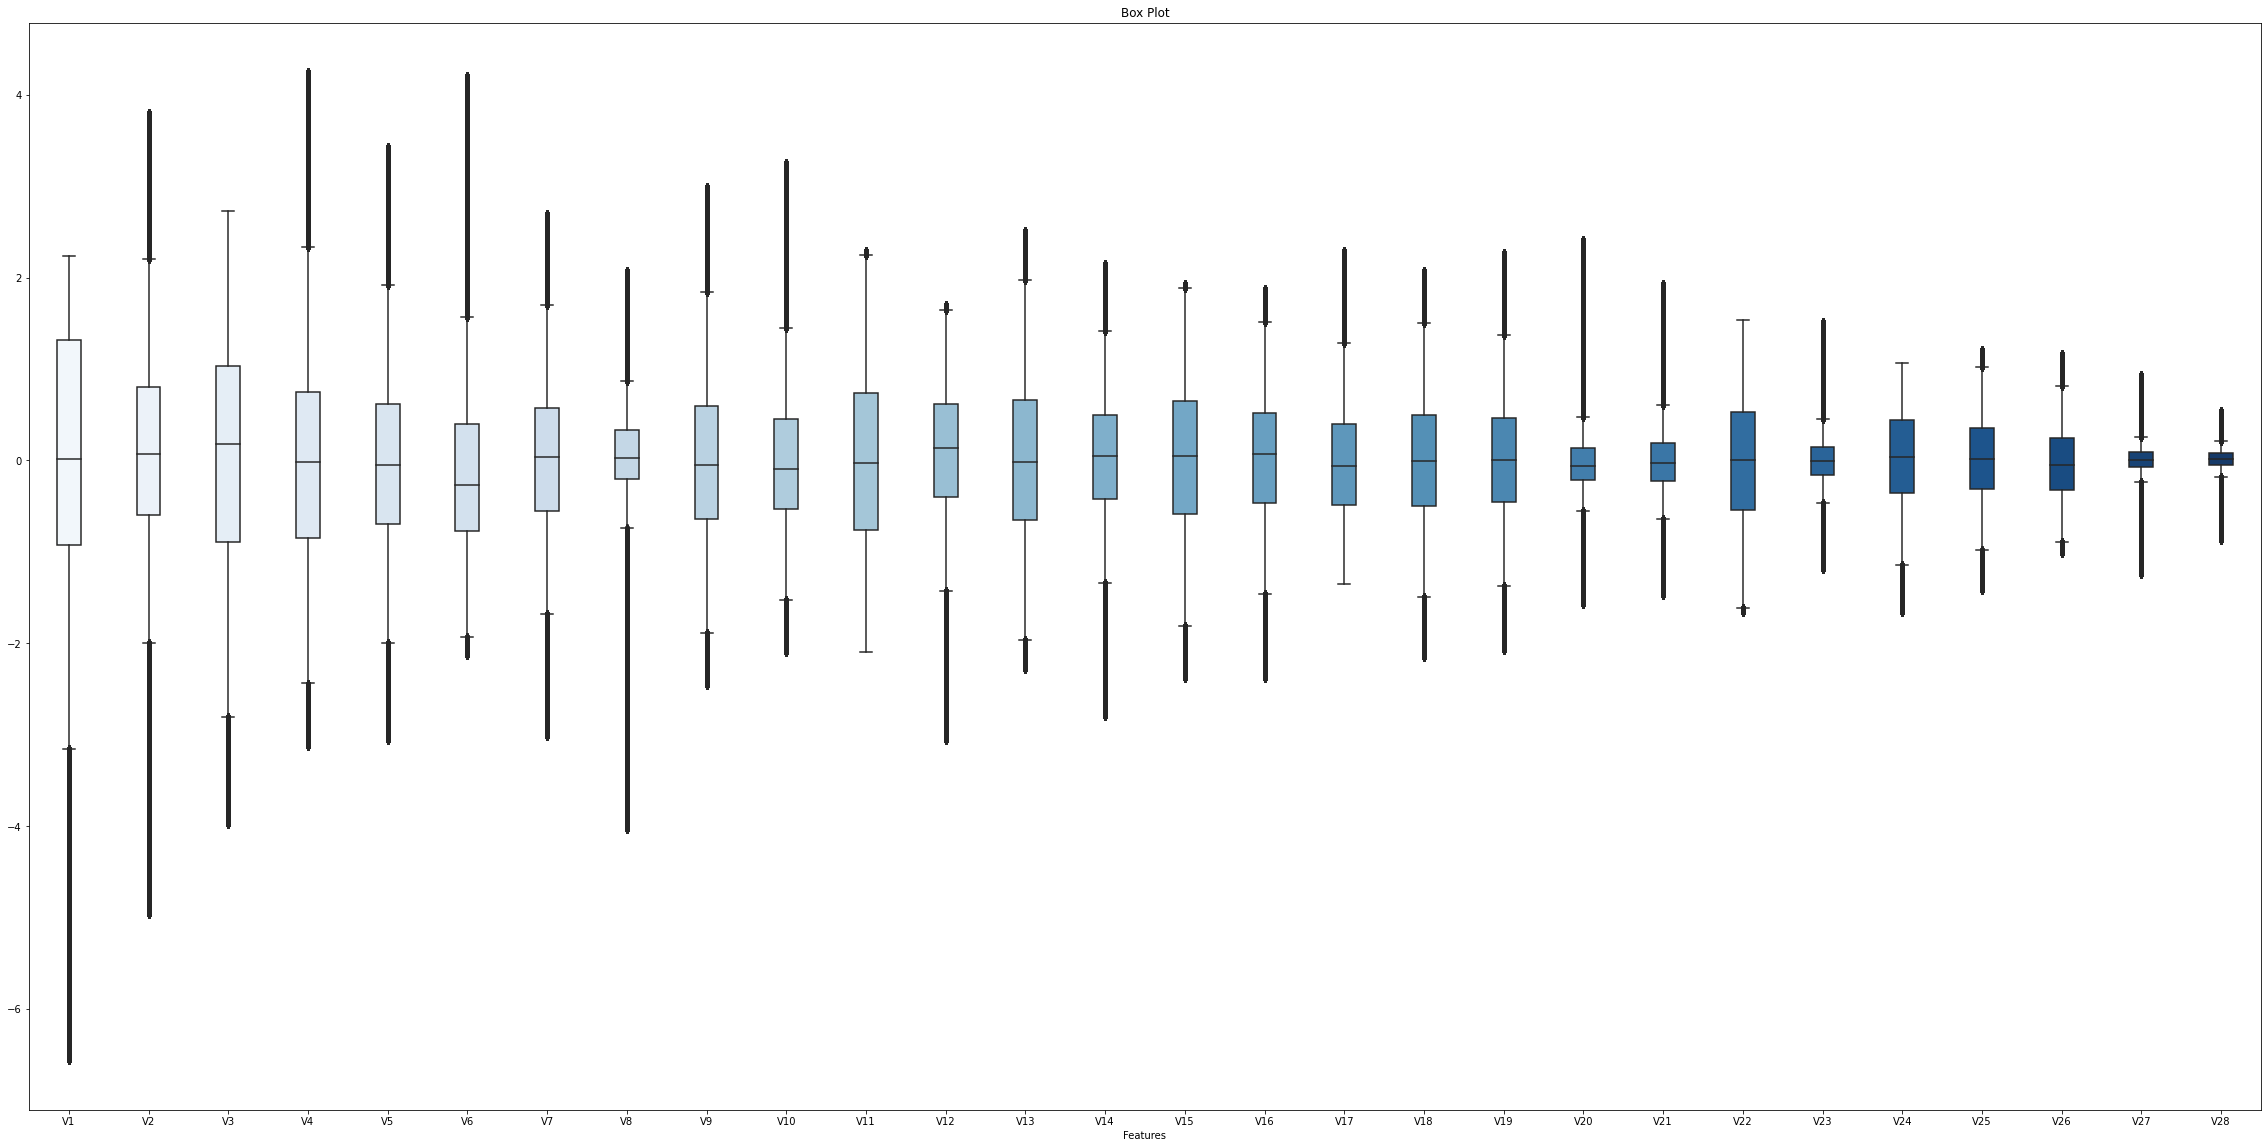

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
ax=sns.boxplot(data=final_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']],palette="Blues",saturation=0.75, width=0.3, dodge=True,linewidth=None, whis=1)
ax.set(title="Box Plot",xlabel="Features")
plt.show()

##### We could observe from the boxplot that most of the outliers have been treated. Now we will try to reduce the dimensionality of dataset.

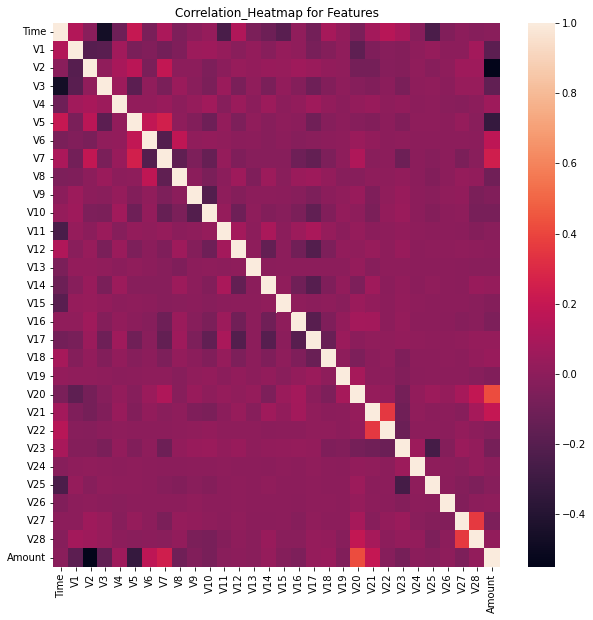

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax=sns.heatmap(final_df.corr())
plt.title("Correlation_Heatmap for Features")
plt.show()

#### We can observe from the heatmap there's not much correlation between the variables, so we cant use corelation method for removing redundant variables

#### Now checking if we could reduce the dimensions using dimensionality reduction algorithm which would be helpful while modelling. We are using PCA for reducing the dimensions

In [13]:
# Standardizing our dataset to implement PCA

In [14]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(final_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]))
scaled_df["Class"]=final_df["Class"]
scaled_df["Class"].replace([b'0', b'1'],[0,1],inplace=True)
scaled_df.columns=final_df.columns

In [15]:
scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.947371,-0.816417,-0.074815,1.834585,1.008393,-0.306239,0.370539,0.259049,0.099889,0.357948,...,-0.027990,0.397405,-0.327714,0.112830,0.257756,-0.399909,0.476562,-0.109728,0.435869,0
1,-1.947371,0.673774,0.190841,0.105462,0.329733,0.046279,-0.069783,-0.091214,0.081936,-0.239122,...,-0.525587,-0.924637,0.282347,-0.569106,0.336090,0.273976,-0.043398,0.081169,-0.486573,0
2,-1.947371,-0.815569,-1.068195,1.277778,0.279837,-0.452150,1.452139,0.866134,0.296599,-1.453325,...,0.610722,1.109759,2.610457,-1.154914,-0.667267,-0.292907,-0.212544,-0.316213,1.873805,0
3,-1.947371,-0.586590,-0.162950,1.292213,-0.627283,-0.015958,1.004908,0.256860,0.467933,-1.330258,...,-0.243833,0.004238,-0.557742,-1.970160,1.309828,-0.470106,0.218170,0.330525,0.271885,0
4,-1.947371,-0.698697,0.670205,1.113982,0.296807,-0.367189,0.074323,0.647749,-0.387641,0.795668,...,-0.006701,1.148127,-0.405452,0.237455,-0.420627,1.079186,0.789775,1.150599,-0.064056,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.596447,-3.855238,2.962109,-2.918746,-1.505428,-2.715190,-1.720065,-3.318860,2.710673,1.853143,...,0.527871,0.157992,2.913145,-0.853267,2.438433,0.539542,3.386769,2.889895,-0.498627,0
284803,1.596447,-0.450234,-0.060941,1.468809,-0.536282,0.761521,0.852310,0.022238,0.358912,0.571058,...,0.529673,1.330031,0.026453,-1.703019,-1.232974,-0.840895,0.239143,-0.283001,-0.347827,0
284804,1.596447,1.098761,-0.253893,-2.387038,-0.404374,2.321088,2.446966,-0.331055,0.904959,0.424160,...,0.572460,0.830712,-0.117487,1.073779,0.535976,-0.182252,0.005621,-0.139115,-0.077303,0
284805,1.596447,-0.162699,0.398026,0.496565,0.506071,-0.341319,0.500934,-0.759370,0.866309,0.385236,...,0.652087,1.150681,-0.479893,0.207176,-1.157004,1.174118,0.386325,0.560362,-0.440680,0


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data_points = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


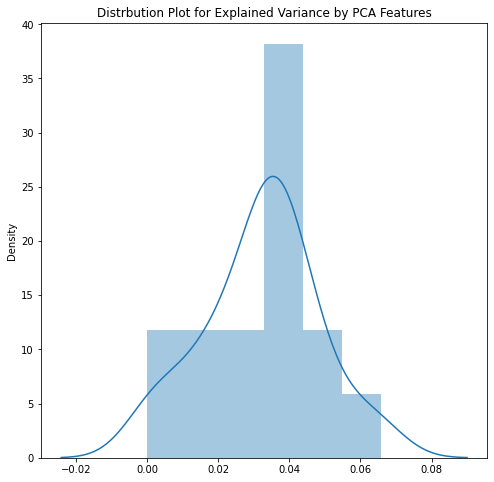

In [17]:
plt.figure(figsize=(8,8))
ax=sns.distplot(explained_variance)
plt.title("Distrbution Plot for Explained Variance by PCA Features")
plt.show()

#### We can observe from the distrbution plot above the dataset doesnt have very high descriptive features that would explain the variance of whole dataset so we would not able to reduce the dimensionality by much.

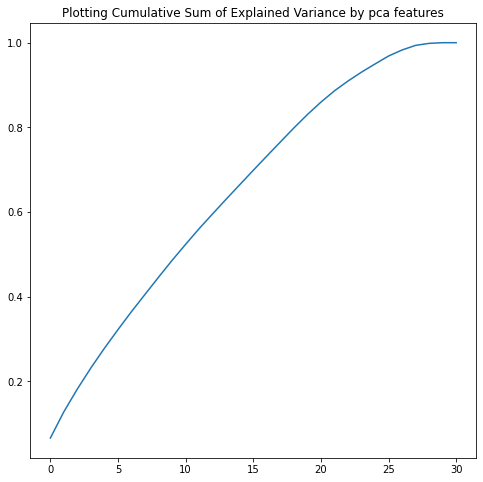

In [18]:
plt.figure(figsize=(8,8))
sns.lineplot(x=list(range(0,len(explained_variance))),y=np.cumsum(explained_variance))
plt.title("Plotting Cumulative Sum of Explained Variance by pca features")
plt.show()

#### We can infer from cumulative sum plot that the variance explained in the dataset increases almost linearly as we add more features to the dataset, but start toflatten from feature 25 number onwards. So we can use pca feature with n>=25 for modelling

In [19]:
pca_dataset=pd.DataFrame(pca_data_points)
pca_dataset=pca_dataset.iloc[:,0:25]
pca_dataset["Class"]=scaled_df["Class"]

In [20]:
# We would be using PCA features till n=25 since they can explain upto 95% of dataset variance
explained_variance[0:25].sum()

0.9496911997916052

### Task 2. 

#### Select three models: a strong learner and a bagging model and a boosting model. For each of the models:
#### a. Motivate the choice of the model. Explain how your data satisfies the model’s requirements. 
#### b. Perform hyperparameter tuning if applicable.
#### c. Train and evaluate your model
#### d. Plot the learning curve and analyze it

#### Ans. a) Since our problem is of binary classifcation, and we are supposed to use a weak learner for the problem 1, so we would go with logistic regression model, and from EDA we inferred that our data is high dimensional and have very class imbalance so we would train baggingclassifier and adaboost classifier to tackle these two issues. and All these models support continious feature set as an input for the training so our data is compatible with all the models. and we have also tackled the issue of outliers with outliers capping since all of our selected machine learning models are sensitive to outliers

In [143]:
pca_dataset

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Class
0,1.270578,-2.350554,0.911022,-0.168824,-0.165805,0.027522,0.169365,0.138364,0.369939,-0.321856,...,-0.497169,0.580711,-1.515014,1.254400,-0.273861,-0.150137,0.487454,0.183567,0.022012,0
1,-0.379314,-1.912414,0.040105,0.330227,0.520617,-0.227997,-0.801586,-0.494945,-0.448210,0.146514,...,0.336785,0.835266,0.463247,-0.164273,-0.354106,0.168605,0.087233,-0.013606,-0.192630,0
2,2.900493,-1.550369,-0.352723,-0.505637,1.032861,1.354544,0.977064,1.620346,2.346416,0.367340,...,0.650381,2.228574,0.225422,0.935731,0.051233,-0.178601,1.049148,-1.448389,0.312283,0
3,0.725212,-1.657364,0.604011,0.365020,-0.634065,0.068407,-1.297696,0.451986,-0.596288,-0.787418,...,1.472462,1.148198,0.961703,-0.095241,-0.118869,0.419636,0.374505,-0.823469,-0.052170,0
4,0.689316,-1.302661,1.297309,-1.071649,0.066042,-0.925171,0.014948,-0.600585,0.077421,-1.607320,...,-0.976145,-0.537073,0.588290,0.886832,-0.049806,-0.427305,-0.117714,-0.114507,-0.344606,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.042955,-0.189920,-1.491812,-5.960071,0.317581,-0.538874,0.746453,0.319201,0.608911,-0.991299,...,-1.596505,0.175804,0.121133,-3.793660,8.840027,-0.210476,0.234489,-1.059302,-1.402365,0
284803,-0.379531,0.657264,0.353245,-1.051351,-0.831739,1.313091,0.198577,-1.136092,0.815361,-0.266665,...,1.111161,2.094029,0.832666,0.982047,-0.209707,-0.693382,-0.323111,-0.121574,0.447827,0
284804,-0.667502,2.281366,-0.377053,-0.740936,-1.588485,2.328376,-0.303111,0.988544,-2.069844,0.993260,...,0.111535,-0.039623,-0.972740,0.497496,0.227261,-0.096170,-0.064509,0.030761,0.068474,0
284805,-0.154980,0.577274,-0.193252,-1.634254,-1.343787,0.351700,0.878952,0.205012,0.138269,0.143040,...,-3.028740,0.631441,-2.222400,0.036835,-1.011831,-0.295213,-0.054349,0.150314,0.522867,0


In [21]:
#Splitting the final pca components dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(pca_dataset.iloc[:,0:25], pca_dataset[['Class']], test_size=0.1, random_state=4)

In [12]:
#Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train.values.ravel())
lr_predictions=lr_model.predict(X_test)
lr_score=f1_score(lr_predictions,y_test.values.ravel(),average="macro")
print("f1_score_macro:",lr_score)
pd.DataFrame(classification_report(y_test.values.ravel(),lr_predictions, output_dict=True)).T

f1_score_macro: 0.6662447999062518


,precision,recall,f1-score,support
0,0.998419,0.999894,0.999156,28424.000000
1,0.800000,0.210526,0.333333,57.000000
accuracy,0.998315,0.998315,0.998315,0.998315
macro avg,0.899210,0.605210,0.666245,28481.000000
weighted avg,0.998022,0.998315,0.997824,28481.000000


##### We could infer that the macro f1 score is low for our logistic regression model, so we will perform hyperparameter tuning for our model to check if we could improve the performance of our model

In [26]:
#Parameter Tuning for Logistic Regression Model using GridSearhCV from Sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
parameters = {'penalty':("l2", "l1"), 'C':(0.1,0.01,1,10),'solver':('lbfgs','liblinear')}
Logistic_model = LogisticRegression(max_iter=1000)
lr_grid=GridSearchCV(Logistic_model,parameters,n_jobs=-1,scoring=f1)
lr_grid.fit(X_train, y_train.values.ravel())
lr_grid_predictions = lr_grid.predict(X_test)
print(lr_grid.best_params_) 

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [14]:
print(classification_report(y_test, lr_grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28424
           1       0.80      0.21      0.33        57

    accuracy                           1.00     28481
   macro avg       0.90      0.61      0.67     28481
weighted avg       1.00      1.00      1.00     28481



##### We observe that performing Hyperparameter Tuning, the macro avg f1 score is increased by 1 percent

In [28]:
#Plotting Learning Curve
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    _, axes = plt.subplots(1, 4, figsize=(30, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="f1_macro",
    )
    #print(score_times)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # Plot score_time vs score
    axes[3].grid()
    axes[3].plot(train_sizes*0.2, score_times_mean, "o-")
    axes[3].fill_between(
        train_sizes*0.2,
        score_times_mean - score_times_std,
        score_times_mean + score_times_std,
        alpha=0.1,
    )
    axes[3].set_xlabel("Scoring examples")
    axes[3].set_ylabel("Prediction_Timing")
    axes[3].set_title("Scoring Time")
    return plt

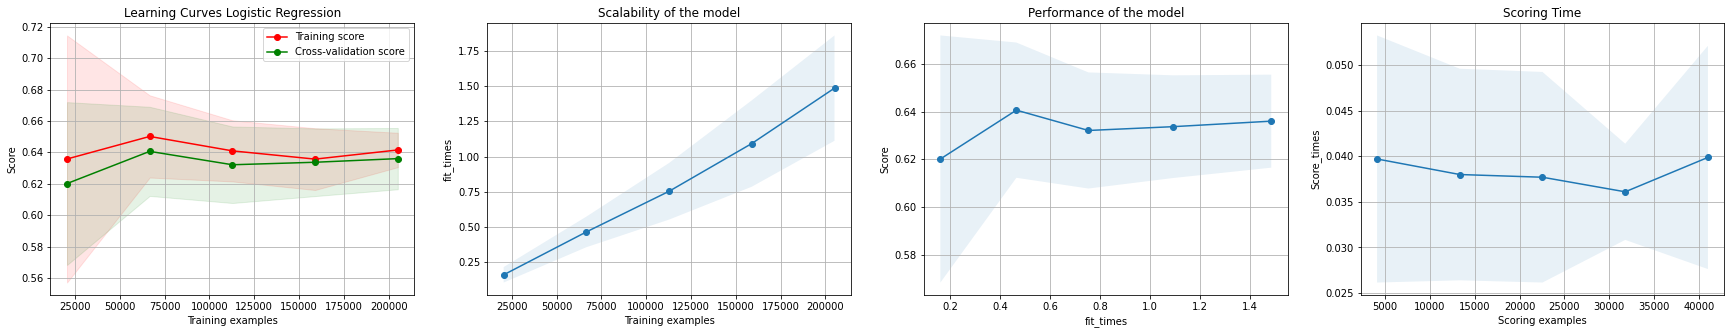

In [17]:
#Making Learning Curves with n_jobs set to 1
title = "Learning Curves Logistic Regression"
n_jobs = 1
train_sizes = np.linspace(0.1, 1.0, 10)

estimator = LogisticRegression(max_iter=200,C=1, penalty='l2', solver= 'lbfgs')
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X_train, y_train.values.ravel(), cv=cv, n_jobs=1)

plt.show()

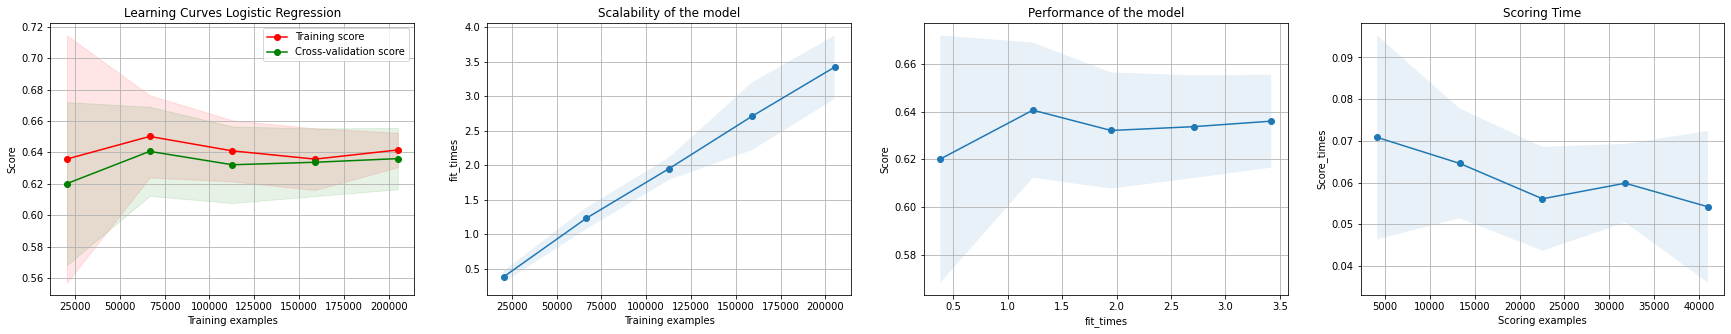

In [18]:
#Making Learning Curves with n_jobs set to 4
title = "Learning Curves Logistic Regression"
n_jobs = 4
train_sizes = np.linspace(0.1, 1.0, 10)

estimator = LogisticRegression(max_iter=200,C=1, penalty='l2', solver= 'lbfgs')
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X_train, y_train.values.ravel(), cv=cv, n_jobs=4)

plt.show()

#### We could observe that training and validation score are quite similar with less variance as the training examples and fit times are increaing. We can also infer that the model has converged as pointers are getting flatter but the overall performance of this model for our dataset is quite low even after performing hyper parameter tuning.

##### Training a Bagging Classifier Model

In [100]:
#Training a BaggingClassifier Model
bg_model=BaggingClassifier(n_jobs=-1)
bg_model.fit(X_train,y_train)
bg_predicitions=bg_model.predict(X_test)
bg_score=f1_score(bg_predicitions,y_test.values.ravel(),average="macro")
print("f1_score_macro:",bg_score)
pd.DataFrame(classification_report(y_test.values.ravel(),bg_predicitions, output_dict=True)).T

f1_score_macro: 0.8020266855517593


,precision,recall,f1-score,support
0,0.998910,0.999894,0.999402,28424.000000
1,0.896552,0.456140,0.604651,57.000000
accuracy,0.998806,0.998806,0.998806,0.998806
macro avg,0.947731,0.728017,0.802027,28481.000000
weighted avg,0.998706,0.998806,0.998612,28481.000000


In [39]:
#Parameter Tuning for Bagging Classifier Model using GridSearhCV from Sklearn
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
parameters = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}
bg_model=BaggingClassifier(n_jobs=-1)
bg_grid=GridSearchCV(bg_model,parameters,n_jobs=-1,scoring=f1)
bg_grid.fit(X_train, y_train.values.ravel())
bg_grid_predictions = bg_grid.predict(X_test)
print(bg_grid.best_params_)

{'max_samples': 0.5}


In [103]:
print(classification_report(y_test, bg_grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28424
           1       0.92      0.40      0.56        57

    accuracy                           1.00     28481
   macro avg       0.96      0.70      0.78     28481
weighted avg       1.00      1.00      1.00     28481



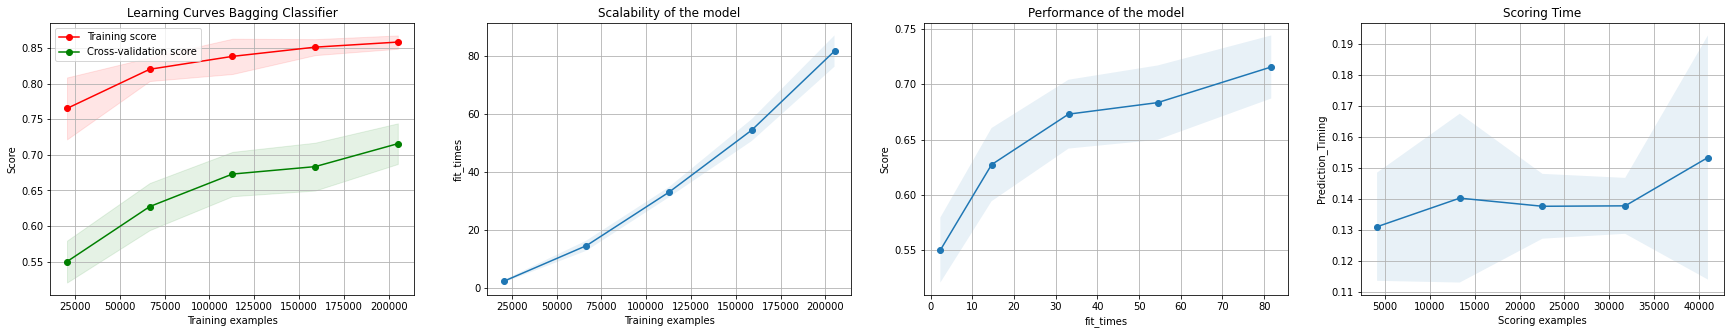

In [30]:
#Making Learning Curves for Bagging Classifier  with n_jobs set to 1
title = "Learning Curves Bagging Classifier"
train_sizes = np.linspace(0.1, 1.0, 10)

estimator = BaggingClassifier(max_samples=0.5)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X_train, y_train.values.ravel(), cv=cv, n_jobs=1)

plt.show()

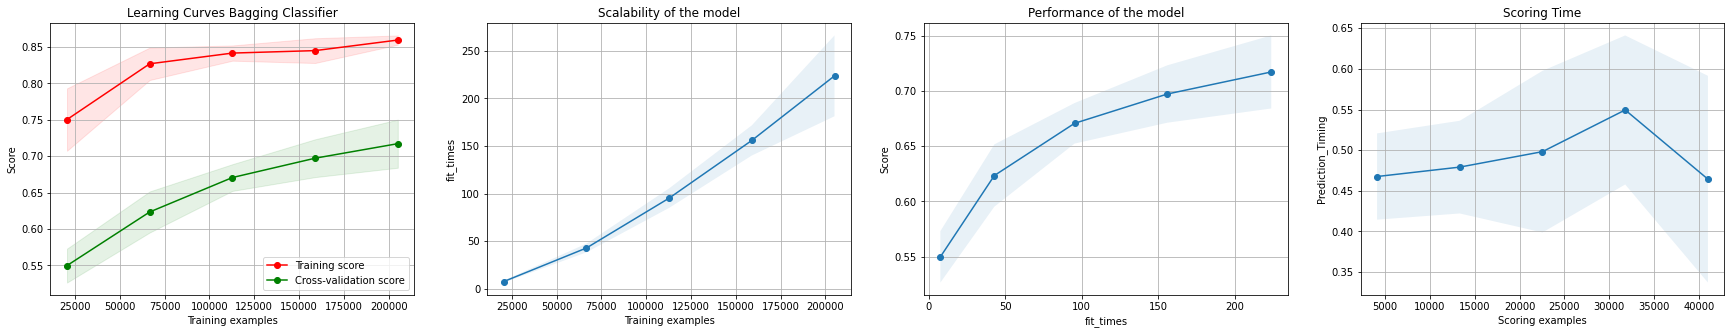

In [31]:
#Making Learning Curves for Bagging Classifier  with n_jobs set to 4
title = "Learning Curves Bagging Classifier"
n_jobs = 4
train_sizes = np.linspace(0.1, 1.0, 10)

estimator = BaggingClassifier(n_jobs=-1,max_samples=0.5)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X_train, y_train.values.ravel(), cv=cv, n_jobs=4)

plt.show()

#### We could observe that this model could be prone to overfitting as there is a significant difference in training and cross validation, and we are also inferring a glimpse of model converging as the cross validation score is getting flatter as we number of examples and fit times are increasing.

In [42]:
#Training Adaboost Classification Model
ada_model=AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_train,y_train)
ada_predictions=ada_model.predict(X_test)
ada_model_score=f1_score(ada_predictions,y_test,average="macro")
print("f1_score_macro:",ada_model_score)
pd.DataFrame(classification_report(y_test,ada_predictions, output_dict=True)).T

f1_score_macro: 0.7580489310205648


,precision,recall,f1-score,support
0,0.998805,0.999683,0.999244,28424.00000
1,0.718750,0.403509,0.516854,57.00000
accuracy,0.998490,0.998490,0.998490,0.99849
macro avg,0.858777,0.701596,0.758049,28481.00000
weighted avg,0.998244,0.998490,0.998279,28481.00000


In [ ]:
#Plotting learning curve for adaboost classifier
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(n_estimators=100, random_state=0), X=X_train, y=y_train.values.ravel(),
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=4)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Task 3.
#### a.) Analyze the bias and variance of the models
Variance: Captures how much your classifier changes if you train on a
different training set.
Bias: What is the inherent error that you obtain from your classifier even
with infinite training data? This is due to your classifier being "biased" to a
particular kind of solution.

#### Bias and Variance of Logistic Regression

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
er = []
y_test = np.array(y_test)
y_test.T
for i in range(len(y_test)):
    x = (y_test[i] - lr_grid_predictions[i]) **2
    er.append(x)
variance_value = np.var(er)
print("BIAS AND VARIANCE FOR LOGISTIC REGRESSION")
print("Variance",variance_value)
print("Bias:", mean_squared_error(y_test,lr_grid_predictions))

BIAS AND VARIANCE FOR LOGISTIC REGRESSION
Variance 0.0016824937314015033
Bias: 0.0016853340823707033


#### Bias and Variance of BaggingClassifier

In [43]:
er = []
y_test = np.array(y_test)
y_test.T
for i in range(len(y_test)):
    x = (y_test[i] - bg_grid_predictions[i]) **2
    er.append(x)
variance_value = np.var(er)
print("BIAS AND VARIANCE FOR BAGGING CLASSIFIER")
print("Variance",variance_value)
print("Bias:", mean_squared_error(y_test,bg_grid_predictions))

BIAS AND VARIANCE FOR BAGGING CLASSIFIER
Variance 0.0011573246719920726
Bias: 0.0011586671816298584


#### Bias and Variance of Boosting Model: Adapative Boosting

In [44]:
er = []
y_test = np.array(y_test)
y_test.T
for i in range(len(y_test)):
    x = (y_test[i] - ada_predictions[i]) **2
    er.append(x)
variance_value = np.var(er)
print("BIAS AND VARIANCE FOR ADAPTIVE BOOSTING")
print("Variance",variance_value)
print("Bias:", mean_squared_error(y_test,ada_predictions))

BIAS AND VARIANCE FOR ADAPTIVE BOOSTING
Variance 0.0015074990178259894
Bias: 0.0015097784487904217


##### From the above analysis it clear that the Bagging Classifier model is having the less bias value of 0.0012288894350619712 and the best variance value 0.001227379265818365 as compared to all other model's Bias values. As Bagging Classifier model is having the less baised data and the variance is not too high we can prefer this model for fraud detection. However, by doing the hyperparameter tuning, sampling and increasing the data preprocessing Adapative Boosting model can be used for fraud detection.

B.) Analyze the impact of the models on imbalance classification
Imbalance classification is a classification where some classes have more
data points than others.
Answer the following question:
● What model can handle the imbalance classification better?

#### Adapative Boosting model is preferable to handle the imbalance classification. As the Adapative Boosting model provides highly accurate prediction rule by combining many weak learners and accurate rules, from above predictions the accuracy of this model is also good at 76%. Though bagging classifier model is having the good accuracy of 78%, but this model will not consider the skewed class distribution for imbalanced classification datasets. and also to counter the issue of imbalanced data, we are using f1 macro scorer which weights our metric towards the smallest one, which helped us to correctly classify the classes irrespective of the class distrbution. We could also implement sampling algorithms along with this scorer method to check if the model performance is improved or not.

#### C.) Analyze the running time for inference and training of each model.
Using the code provided in the case-study tutorial measure and visualize
the running time of training and testing of the models
● Which model is the fastest with one worker thread?
● Which model is the fastest with 4 worker threads (use the n_jobs
parameter of an estimator)?

![picture](https://drive.google.com/uc?id=1rbDHSPSPRTvwVvm9bdYKJwCIy1M8fS5J)
![picture](https://drive.google.com/uc?id=12MHs01nek-NeYncqlTSXuFJp8uJewChM)
 #### We infer from the learning curves - scalablity and scoring time panels that for n_jobs set to 1 instead of 4, the processing takes place faster for both Logistic Regression and bagging classifier models. Reason for these could be that our data is not very high dimensional and we havent reached the threshold at which parallel processing works better than single core processing. We also observe that Bagging Classifier takes the highest training time which is expected but scoring time is somewhat comparable for all 3 models and the scalablity for these models are almost linear. We could also see the downward trend for prediction when n_jobs set to 4, where when we cross a certain size of sample, then the parallelization is helping to overcome the performance of single core

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. https://scikit-learn.org/stable/index.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
4. https://seaborn.pydata.org/